In [132]:
# import some common packages
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

# read data file
file_location = "C:/Users/hanxia/Desktop/BitTiger BA501/Project2/"
file_name = "orders_new.csv"
my_data = pd.read_csv(file_location + file_name)
my_data.head(10)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,US,2017-04-02,12624549,6720123150182430132,49.99,3659561261588336546,ANDROID_APPS
1,US,2017-04-01,12624549,17511438899767627798,0.99,3659561261588336546,ANDROID_APPS
2,US,2017-04-04,12624549,1549342062436664018,39.99,3659561261588336546,ANDROID_APPS
3,US,2017-04-04,12624549,7771425263197855716,19.99,3659561261588336546,ANDROID_APPS
4,US,2017-04-01,12624549,17943210556580942992,19.99,3659561261588336546,ANDROID_APPS
5,US,2017-04-01,12624549,14181259234722501452,9.99,3659561261588336546,ANDROID_APPS
6,US,2017-04-06,12624549,2216871028985838700,19.99,3659561261588336546,ANDROID_APPS
7,US,2017-04-05,12624548,2401579091544890692,0.99,2320465914243698778,ANDROID_APPS
8,US,2017-04-06,12624548,6311345639701552883,4.99,14788950912323597325,ANDROID_APPS
9,US,2017-04-05,12624549,7059034589483462446,49.99,16325981456106360689,ANDROID_APPS


In [ ]:
# Class 1, Question 1: How do you handle duplicate values in a dataset in Python?

# Answer: 
# First, we need to double-check whether the duplicate values in this dataset are meaningful and useful for our data 
# analysis. For example, user_id is duplicated in the table, but we cannot delete any row about it because it is valuable, 
# showing us how many orders each user may have, which is kind of one KPI in our business strategies. Therefore, we need keep
# all duplicate values of the same user_id in the dataset. 
# Second, if we find out there exist same values of all columns in different rows, which means the table has duplicate rows,
# this scenario could happen due to wrong user input, duplicate data manipulation, or database system error. In such case, we
# obviously should delete duplicate values even rows and columns in the dataset. So many functions like my_data.duplicated(),
# my_data.drop_duplicated(key), and my_data.drop(index) could help us delete duplicate values in the dataset. Here is a brief 
# example about how to delete duplicate values of DataFrame--temp.

In [26]:
temp = pd.DataFrame([[1,2],[1,2],[1,2],[3,4],[4,5]])
temp.duplicated()
temp.drop_duplicates()

,0,1
0,1,2
3,3,4
4,4,5


In [32]:
# Class 1, Question 2: You are given two tables - friend_request and request_accepted. Friend_request contains requester_id, 
# time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. How will you determine the 
# overall acceptance rate of requests? 

# Answer:
# For example, first, we build these two tables of friend_request and request_accepted of this question. 
friend_request = {"requester_id":(1,2), "time":(20170101,20160202), "sent_to_id":(2,3)}
request_accepted = {"time":(20170101), "acceptor_id":(2), "requestor_id":(1)}
# Of course, if we want to determine the overall acceptance rate of requests, it's necessary to understand how to get 
# overall acceptance rate of requests. In my opinion, acceptance rate = rows amount of acceptor_id / total rows amount of 
# sent_to_id. Here I assume that one requester_id can send requests many times to different people or same people at 
# different time, and one acceptor_id can only accepet a request once from one requestor_id. 
# First solution to use SQL:
Select case when(select count(distinct requestor_id, sent_to_id) as c1 From request_accepted)=0 then 0
            else count(distinct acceptor_id, requestor_id)/c1 End As acc_rate
From request_accepted

# Second solution to use Python:
table1 = request_accepted.groupby(["acceptor_id","requestor_id"]).nunique()
table2 = friend_request.groupby(["requester_id","sent_to_id"]).nunique()
num1 = table1.sum()[[1]]
num2 = table2.sum()[[0]]
acc_rate = num1/num2

In [91]:
# In order to explain what I do with above functions to get unique groups of acceptor_id and requestor_id and sum of those
# groups, here I use my_data as an example. Then we can use the number we get to calculate rate in next step if necessary.
temp = my_data.groupby(["user_id","experiment_id"]).nunique()
temp1 = temp.sum()
print(temp1)
temp1 = temp1[[5]]
print(temp1)

country          15497
date             24498
experiment_id    15497
order_id         39958
spend_usd        25963
user_id          15497
vertical         15865
dtype: int64
user_id    15497
dtype: int64


In [ ]:
# Class 1, Question 3: Do some research and summarize the business model of your dream company, or company that you 
# interview with.
# (1)What is the product
# (2)Who are the customer
# (3)How do they make money
# (4)Why do you want to work for this company?
# (5)(Optional) If you were CEO, what would you do to increase company’s revenue in the next 5 years?

# Answer: 
# The company I'm gonna interview with is Amazon, Alexa Group, which belongs to lab126, developing many fancy software
# applications and smart electronic devices.
# (1) The product of this team is the application called "Alexa", which is kind of intelligent personal assistant software, 
# capable of voice interaction, music playback, making to-do lists, and broadcast news, as well as controlling some smart 
# home devices. So convenience, intelligence, interaction, and functionality are outstanding features of this product.
# (2) This app is available from the Apple App Store, Google Play, and Amazon Appstore. Therefore, all users with IOS or
# Android system cell phones could be customers of this product theoratically. But in fact, not all of home devices could
# be connected with Alexa, so currently customers are thoses who own Alexa-enabled smart devices and who are willing to use
# Alexa app to facilitate lifestyle. It could help them install skills, control music, manage alarms, and view shopping lists. 
# It also allows users to review the recognized text on the app screen and to send feedback to Amazon concerning whether the 
# recognition was good or bad. A web interface is also available to set-up compatible devices (e.g., Amazon Echo, Amazon Dot)
# (3) They make money mostly by data collected from customers via Alexa, which could be further used as advertising, online
# shopping, and recommendation system. Perhaps most important, Alexa could significantly increase the data that companies 
# have on customers' preferences and everyday lives. A deeper profile of the customer is possible and valuable.
# (4) Its work and goal are fantastic and frontier, including AI, ML, NLP, and other advanced technologies, which can lead 
# tech development trend in future. Lots of fun to do cool things and meet so many talented people.
# (5) If I were CEO, I probably do following things to increase revenue in the next 5 years.
# First, to develop more perfect apps to satisfy customers' requirements and preferences
# Second, to advertise Alexa-enabled home devices on the market and try to sell more of them to have more customer base
# Third, to do more data analysis of current customers and increase conversion rate of Amazon online purchase

In [103]:
# Class 2, Question 1: Similarly to PrintDailyTimeSeries() in the sample code, write a Python function called 
# PrintCumulativeTimeSeries(). 

# check range of experiment_id (three parameters of the final function)
a = my_data.experiment_id
print(np.unique(a))

# check range of country
b = my_data.country
print(np.unique(b))

# check range of vertical 
c = my_data.vertical
print(np.unique(c))

[12624548 12624549]
['JP' 'US']
['ANDROID_APPS' 'COMMERCE' 'MAGAZINES' 'MULTI_CONTAINER' 'MUSIC' 'OCEAN'
 'YOUTUBE']


In [119]:
# build function of GetSeries, return a list by data
def GetSeries(my_data, id, cou, ver):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == id][my_data.country == cou][my_data.vertical == ver]
    series = table.groupby('date')['spend_usd'].sum()
    return(series)
# test the series according to three inputs
red = GetSeries(my_data, 12624548, 'US', 'ANDROID_APPS')
blue = GetSeries(my_data, 12624549, 'US', 'ANDROID_APPS')
print(red,blue)

date
2017-04-01    17746.477584
2017-04-02    14821.810000
2017-04-03    13320.780000
2017-04-04    12925.849109
2017-04-05    13158.418167
2017-04-06    15844.400000
2017-04-07    18402.031397
Name: spend_usd, dtype: float64 date
2017-04-01    18826.945113
2017-04-02    15067.492776
2017-04-03    13376.468889
2017-04-04    13326.412945
2017-04-05    14830.642189
2017-04-06    17715.210925
2017-04-07    17910.454479
Name: spend_usd, dtype: float64


C:\Users\hanxia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


['2017-04-01' '2017-04-02' '2017-04-03' '2017-04-04' '2017-04-05'
 '2017-04-06' '2017-04-07']
date
2017-04-01    17746.477584
2017-04-02    14821.810000
2017-04-03    13320.780000
2017-04-04    12925.849109
2017-04-05    13158.418167
2017-04-06    15844.400000
2017-04-07    18402.031397
Name: spend_usd, dtype: float64 date
2017-04-01    18826.945113
2017-04-02    15067.492776
2017-04-03    13376.468889
2017-04-04    13326.412945
2017-04-05    14830.642189
2017-04-06    17715.210925
2017-04-07    17910.454479
Name: spend_usd, dtype: float64
None


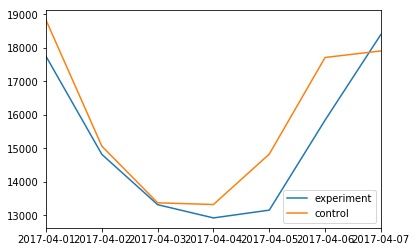

In [133]:
# given two series, plot the time series
def PlotSeries(index_series, experiment_series, control_series):
    df = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series.tolist(), # a range of dates
        columns = ["experiment", "control"]
    )
    df.plot()
# test these plot
index = np.unique(my_data.date)
print(index)
print(red, blue)
print(PlotSeries(index, red, blue))

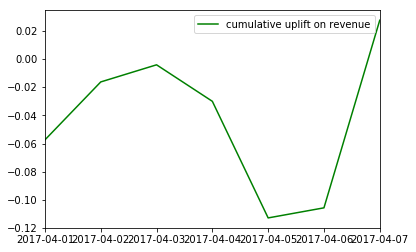

In [153]:
# Print out the cumulative % uplift on revenue, experiment vs. control. Hint: (red - blue) / blue %
def PlotUplift(index_series, experiment_series, control_series):
    a = experiment_series.tolist()
    b = control_series.tolist()
    c = [(x-y)/y for x,y in zip(a,b)]
    df = pd.DataFrame(
        {
            "cumulative uplift on revenue": c
        },
        index = index_series.tolist(), # a range of dates
        columns = ["cumulative uplift on revenue"]
    )
    df.plot(color = 'g')
index = np.unique(my_data.date)
PlotUplift(index, red, blue)

C:\Users\hanxia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


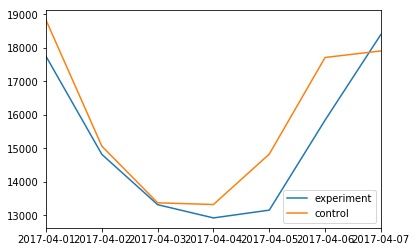

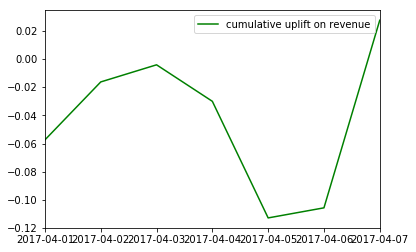

In [157]:
# given two series, plot the time series
def PlotSeries(index_series, experiment_series, control_series):
    df = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series.tolist(), # a range of dates
        columns = ["experiment", "control"]
    )
    df.plot()

def PlotUplift(index_series, experiment_series, control_series):
    a = experiment_series.tolist()
    b = control_series.tolist()
    c = [(x-y)/y for x,y in zip(a,b)]
    df = pd.DataFrame(
        {
            "cumulative uplift on revenue": c
        },
        index = index_series.tolist(), # a range of dates
        columns = ["cumulative uplift on revenue"]
    )
    df.plot(color = 'g')


# PrintCumulativeTimeSeries()
def PrintCumulativeTimeSeries(my_data, ids, cous, vers):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    experiment_series = GetSeries(my_data, ids[0], cous[0], vers[0])
    control_series = GetSeries(my_data, ids[1], cous[1], vers[1])
    
    PlotSeries(index_series, experiment_series, control_series)
    PlotUplift(index_series, experiment_series, control_series)

# test function
PrintCumulativeTimeSeries(my_data, [12624548,12624549], ['US','US'], ['ANDROID_APPS','ANDROID_APPS'])

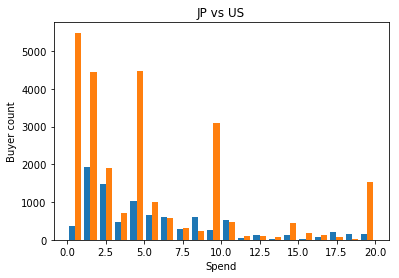

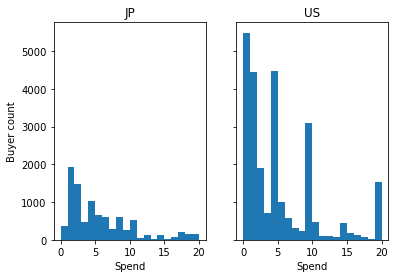

In [170]:
# Class 2, Question 2: Using our data, draw a histogram which plots both US and JP data on the same plot

my_series_jp = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "JP")]
my_series_us = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "US")]
series = [j for i in zip(my_series_jp,my_series_us) for j in i]

# drwa one plot which contains both US and JP data on the same plot
fig, ax = plt.subplots()
ax.hist((my_series_jp, my_series_us),bins=20)
ax.set_title("JP vs US")
ax.set_xlabel("Spend")
ax.set_ylabel("Buyer count")

# draw two plots
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].hist(my_series_jp, bins=20)
ax[1].hist(my_series_us, bins=20)
ax[0].set_title("JP")
ax[1].set_title("US")
ax[0].set_ylabel("Buyer count")
ax[0].set_xlabel("Spend")
ax[1].set_xlabel("Spend")

C:\Users\hanxia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


None


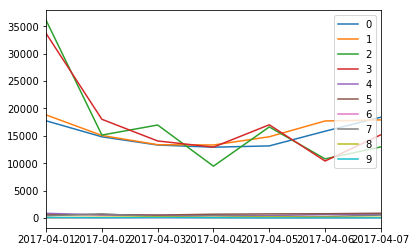

In [203]:
# Class 2, Question 3: (Optional) Write a function that can plot 10 (instead of 2) time series in our data.
# given ten series, plot the time series
def PlotTenSeries(index_series, series, num):
    df = pd.DataFrame(
        {
            "0": series[0].tolist(),
            "1": series[1].tolist(),
            "2": series[2].tolist(),
            "3": series[3].tolist(),
            "4": series[4].tolist(),
            "5": series[5].tolist(),
            "6": series[6].tolist(),
            "7": series[7].tolist(),
            "8": series[8].tolist(),
            "9": series[9].tolist(),
        },
        index = index_series.tolist(), # a range of dates
        columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
    )
    df.plot()

# test these plot
index = np.unique(my_data.date)

a = GetSeries(my_data, 12624548, 'US', 'ANDROID_APPS')
b = GetSeries(my_data, 12624549, 'US', 'ANDROID_APPS')
c = GetSeries(my_data, 12624548, 'JP', 'ANDROID_APPS')
d = GetSeries(my_data, 12624549, 'JP', 'ANDROID_APPS')
e = GetSeries(my_data, 12624548, 'US', 'MUSIC')
f = GetSeries(my_data, 12624549, 'US', 'MUSIC')
g = GetSeries(my_data, 12624548, 'JP', 'YOUTUBE')
h = GetSeries(my_data, 12624549, 'US', 'YOUTUBE')
i = GetSeries(my_data, 12624548, 'US', 'OCEAN')
j = GetSeries(my_data, 12624549, 'JP', 'OCEAN')

print(PlotTenSeries(index, [a,b,c,d,e,f,g,h,i,j], 10))